In [1]:
from skimage.io import imread
from napari_workflow_optimizer import JaccardLabelImageOptimizer, Optimizer, Workflow
import pyclesperanto_prototype as cle

/Users/haase/code/pyclesperanto_prototype/pyclesperanto_prototype/_tier0/_pycl.py:30: UserWarning: Data type double is not supported by your GPU. Will use float instead.
  warnings.warn("Data type double is not supported by your GPU. Will use float instead.")


In [2]:
w = Workflow()
w.set("labeled", cle.voronoi_otsu_labeling, "input", spot_sigma=1, outline_sigma=5)

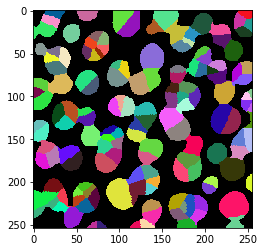

In [3]:
w.set("input", imread("blobs.tif"))
result = w.get("labeled")

cle.imshow(result, labels=True)

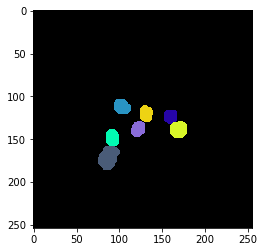

In [4]:
ground_truth = imread("blobs_sparse_labels.tif")
cle.imshow(ground_truth, labels=True)

 final_simplex: (array([[ 3.18913574, -7.95849609],
       [ 3.19094238, -7.83056641],
       [ 3.19572983, -7.92399597]]), array([-0.08336982, -0.08336982, -0.08336982]))
           fun: -0.08336982363781267
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 41
           nit: 20
        status: 2
       success: False
             x: array([ 3.18913574, -7.95849609])


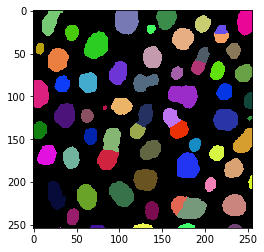

In [5]:
jlio = JaccardLabelImageOptimizer(w)
best_param = jlio.optimize("labeled", ground_truth, maxiter=20)
jlio.set_numeric_parameters(best_param)
cle.imshow(w.get("labeled"), labels=True)

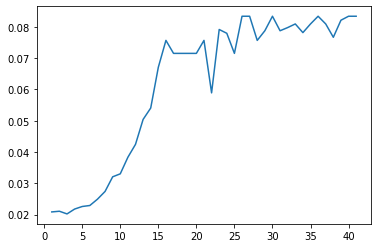

In [6]:
import matplotlib.pyplot as plt
attempt, quality = jlio.get_plot()

plt.plot(attempt, quality)